In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/users/student/GIT/module_4/project_4.csv')

In [3]:
df

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount
0,136119,Anapa,Moscow,214890000.0,113,1.683333,Boeing 737-300,130
1,136120,Anapa,Moscow,208702000.0,109,1.650000,Boeing 737-300,130
2,136122,Anapa,Moscow,186030000.0,97,1.666667,Boeing 737-300,130
3,136130,Anapa,Moscow,202358000.0,107,1.650000,Boeing 737-300,130
4,136131,Anapa,Moscow,235664000.0,124,1.650000,Boeing 737-300,130
...,...,...,...,...,...,...,...,...
175,136943,Anapa,Belgorod,71178600.0,94,0.833333,Sukhoi Superjet-100,97
176,136951,Anapa,Belgorod,69898200.0,90,0.816667,Sukhoi Superjet-100,97
177,136953,Anapa,Belgorod,74234100.0,97,0.833333,Sukhoi Superjet-100,97
178,136956,Anapa,Belgorod,72400800.0,96,0.833333,Sukhoi Superjet-100,97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          180 non-null    int64  
 1   departure          180 non-null    object 
 2   arrive             180 non-null    object 
 3   flight_revenue     180 non-null    float64
 4   passengers_amount  180 non-null    int64  
 5   flight_time        180 non-null    float64
 6   model              180 non-null    object 
 7   seats_amount       180 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 11.4+ KB


### Исследуем наши данные

In [5]:
# посмотрим в какие города летают рейсы из Анапы в зимнее время
df.arrive.value_counts()

Belgorod    90
Moscow      90
Name: arrive, dtype: int64

Видим что распределение по направлениям равномерное.

Для более удобного и правильного исследования разделим dataframe на 2 (по направлениям)

In [43]:
df_1 = df[df.arrive == 'Moscow']
df_2 = df[df.arrive == 'Belgorod']

### Рассмотрим рейсы на Москву

In [44]:
df_1

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount
0,136119,Anapa,Moscow,214890000.0,113,1.683333,Boeing 737-300,130
1,136120,Anapa,Moscow,208702000.0,109,1.650000,Boeing 737-300,130
2,136122,Anapa,Moscow,186030000.0,97,1.666667,Boeing 737-300,130
3,136130,Anapa,Moscow,202358000.0,107,1.650000,Boeing 737-300,130
4,136131,Anapa,Moscow,235664000.0,124,1.650000,Boeing 737-300,130
...,...,...,...,...,...,...,...,...
85,136479,Anapa,Moscow,225992000.0,122,1.650000,Boeing 737-300,130
86,136485,Anapa,Moscow,197600000.0,106,1.666667,Boeing 737-300,130
87,136486,Anapa,Moscow,195702000.0,107,1.683333,Boeing 737-300,130
88,136491,Anapa,Moscow,195702000.0,103,1.683333,Boeing 737-300,130


<AxesSubplot:>

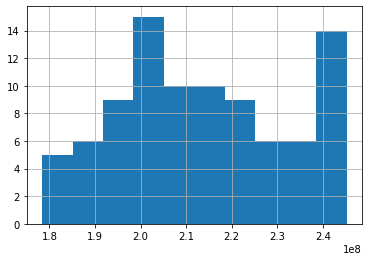

In [45]:
# посмотрим на выручку с продажи билетов
df_1.flight_revenue.hist()

<AxesSubplot:>

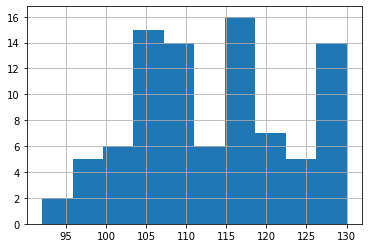

In [46]:
# посмотрим на количество пассажиров на рейсах
df_1.passengers_amount.hist()

<AxesSubplot:>

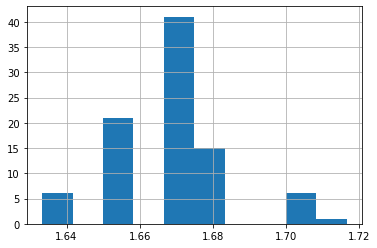

In [47]:
# посмотрим на время полёта
df_1.flight_time.hist()

In [48]:
# посмотрим на модели самолётов, летающих по данному направлению
df_1.model.value_counts()

Boeing 737-300    90
Name: model, dtype: int64

Как видим, очевидных выборосов в данных нет

#### Добавим данные по расходам на топливо

In [49]:
# создадим столбец с расходом топлива
# для данной модели самолёта расход составляет 2600 кг/ч
df_1['fuel_per_hour'] = 2600

<ipython-input-49-91049324f93c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['fuel_per_hour'] = 2600


In [50]:
# рассчитаем количество затраченного топлива за время полёта
df_1['consumed_fuel'] = df_1['flight_time']*df_1['fuel_per_hour']

<ipython-input-50-a5f910be2577>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['consumed_fuel'] = df_1['flight_time']*df_1['fuel_per_hour']


In [51]:
# добавим стоимость авиационного топлива, за кг (по данным за январь 2017г в г.Анапа)
df_1['fuel_price'] = 41435/1000

<ipython-input-51-2b4aae252365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['fuel_price'] = 41435/1000


In [52]:
# рассчитаем стоимость потраченного за рейс топлива
df_1['spent_for_flight'] = round(df_1['consumed_fuel']*df_1['fuel_price'])

<ipython-input-52-5cd102911df4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['spent_for_flight'] = round(df_1['consumed_fuel']*df_1['fuel_price'])


In [53]:
df_1.sample(5)

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount,fuel_per_hour,consumed_fuel,fuel_price,spent_for_flight
34,136266,Anapa,Moscow,203632000.0,108,1.666667,Boeing 737-300,130,2600,4333.333333,41.435,179552.0
39,136275,Anapa,Moscow,237250000.0,125,1.633333,Boeing 737-300,130,2600,4246.666667,41.435,175961.0
19,136204,Anapa,Moscow,189514000.0,107,1.666667,Boeing 737-300,130,2600,4333.333333,41.435,179552.0
26,136244,Anapa,Moscow,221390000.0,117,1.650000,Boeing 737-300,130,2600,4290.000000,41.435,177756.0
12,136165,Anapa,Moscow,203788000.0,110,1.683333,Boeing 737-300,130,2600,4376.666667,41.435,181347.0


#### Рассчитаем ключевые показатели, по которым можно будет определить малоприбыльные рейсы

In [54]:
# рассчитаем прибыль за рейс
df_1['profit'] = df_1['flight_revenue'] - df_1['spent_for_flight']

<ipython-input-54-aec14ad8cb49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['profit'] = df_1['flight_revenue'] - df_1['spent_for_flight']


In [55]:
# а так же загрузку рейса
df_1['load_perc'] = df_1['passengers_amount']/df_1['seats_amount']

<ipython-input-55-b51e029436f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['load_perc'] = df_1['passengers_amount']/df_1['seats_amount']


In [56]:
df_1.sample(5)

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount,fuel_per_hour,consumed_fuel,fuel_price,spent_for_flight,profit,load_perc
40,136282,Anapa,Moscow,197444000.0,106,1.683333,Boeing 737-300,130,2600,4376.666667,41.435,181347.0,197262653.0,0.815385
80,136463,Anapa,Moscow,232492000.0,122,1.650000,Boeing 737-300,130,2600,4290.000000,41.435,177756.0,232314244.0,0.938462
85,136479,Anapa,Moscow,225992000.0,122,1.650000,Boeing 737-300,130,2600,4290.000000,41.435,177756.0,225814244.0,0.938462
32,136262,Anapa,Moscow,242008000.0,128,1.650000,Boeing 737-300,130,2600,4290.000000,41.435,177756.0,241830244.0,0.984615
19,136204,Anapa,Moscow,189514000.0,107,1.666667,Boeing 737-300,130,2600,4333.333333,41.435,179552.0,189334448.0,0.823077


#### Посмотрим на полученные показатели

<AxesSubplot:>

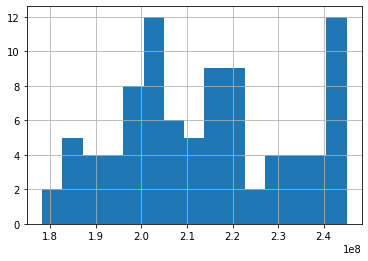

In [82]:
df_1.profit.hist(bins=15)

<AxesSubplot:>

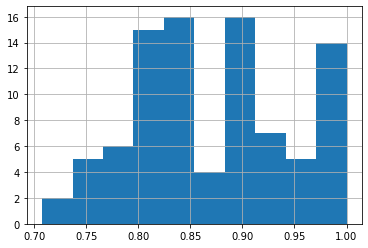

In [59]:
df_1.load_perc.hist()

Из данных видно, что существуют явные рейсы с низкой загрузкой/прибылью

In [79]:
df_1.query('profit<183000000')

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount,fuel_per_hour,consumed_fuel,fuel_price,spent_for_flight,profit,load_perc
28,136250,Anapa,Moscow,183014000.0,99,1.683333,Boeing 737-300,130,2600,4376.666667,41.435,181347.0,182832653.0,0.761538
30,136253,Anapa,Moscow,183014000.0,93,1.633333,Boeing 737-300,130,2600,4246.666667,41.435,175961.0,182838039.0,0.715385
56,136352,Anapa,Moscow,178412000.0,92,1.666667,Boeing 737-300,130,2600,4333.333333,41.435,179552.0,178232448.0,0.707692
69,136418,Anapa,Moscow,183014000.0,97,1.666667,Boeing 737-300,130,2600,4333.333333,41.435,179552.0,182834448.0,0.746154
81,136464,Anapa,Moscow,181740000.0,100,1.666667,Boeing 737-300,130,2600,4333.333333,41.435,179552.0,181560448.0,0.769231


In [80]:
df_1.query('load_perc<0.75')

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount,fuel_per_hour,consumed_fuel,fuel_price,spent_for_flight,profit,load_perc
2,136122,Anapa,Moscow,186030000.0,97,1.666667,Boeing 737-300,130,2600,4333.333333,41.435,179552.0,185850448.0,0.746154
30,136253,Anapa,Moscow,183014000.0,93,1.633333,Boeing 737-300,130,2600,4246.666667,41.435,175961.0,182838039.0,0.715385
56,136352,Anapa,Moscow,178412000.0,92,1.666667,Boeing 737-300,130,2600,4333.333333,41.435,179552.0,178232448.0,0.707692
57,136360,Anapa,Moscow,189202000.0,97,1.666667,Boeing 737-300,130,2600,4333.333333,41.435,179552.0,189022448.0,0.746154
69,136418,Anapa,Moscow,183014000.0,97,1.666667,Boeing 737-300,130,2600,4333.333333,41.435,179552.0,182834448.0,0.746154


Как видим, малозаполненные рейсы как правило являются так же и менее прибыльными

#### Проведем такой же анализ для второго направления

### Рассмотрим рейсы на Белгород

In [83]:
df_2

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount
90,136571,Anapa,Belgorod,73011900.0,95,0.833333,Sukhoi Superjet-100,97
91,136586,Anapa,Belgorod,73623000.0,96,0.833333,Sukhoi Superjet-100,97
92,136592,Anapa,Belgorod,65678700.0,89,0.833333,Sukhoi Superjet-100,97
93,136600,Anapa,Belgorod,74234100.0,97,0.833333,Sukhoi Superjet-100,97
94,136605,Anapa,Belgorod,74234100.0,97,0.850000,Sukhoi Superjet-100,97
...,...,...,...,...,...,...,...,...
175,136943,Anapa,Belgorod,71178600.0,94,0.833333,Sukhoi Superjet-100,97
176,136951,Anapa,Belgorod,69898200.0,90,0.816667,Sukhoi Superjet-100,97
177,136953,Anapa,Belgorod,74234100.0,97,0.833333,Sukhoi Superjet-100,97
178,136956,Anapa,Belgorod,72400800.0,96,0.833333,Sukhoi Superjet-100,97


<AxesSubplot:>

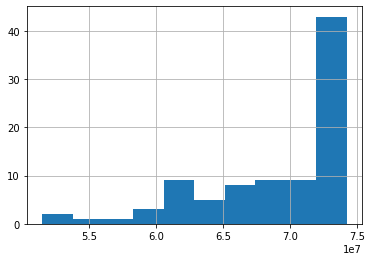

In [84]:
# посмотрим на выручку с продажи билетов
df_2.flight_revenue.hist()

<AxesSubplot:>

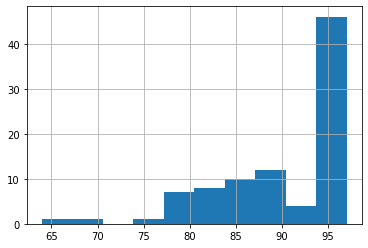

In [85]:
# посмотрим на количество пассажиров на рейсах
df_2.passengers_amount.hist()

<AxesSubplot:>

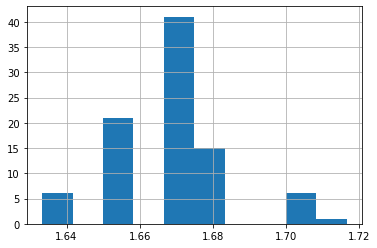

In [86]:
# посмотрим на время полёта
df_1.flight_time.hist()

In [87]:
# посмотрим на модели самолётов, летающих по данному направлению
df_1.model.value_counts()

Boeing 737-300    90
Name: model, dtype: int64

#### Добавим данные по расходам на топливо

In [89]:
# создадим столбец с расходом топлива
# для данной модели самолёта расход составляет 2600 кг/ч
df_2['fuel_per_hour'] = 1864

<ipython-input-89-cdeb16511db0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['fuel_per_hour'] = 1864


In [90]:
# рассчитаем количество затраченного топлива за время полёта
df_2['consumed_fuel'] = df_2['flight_time']*df_2['fuel_per_hour']

<ipython-input-90-02860e5f99a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['consumed_fuel'] = df_2['flight_time']*df_2['fuel_per_hour']


In [91]:
# добавим стоимость авиационного топлива, за кг (по данным за январь 2017г в г.Анапа)
df_2['fuel_price'] = 41435/1000

<ipython-input-91-f40fe1cfffb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['fuel_price'] = 41435/1000


In [92]:
# рассчитаем стоимость потраченного за рейс топлива
df_2['spent_for_flight'] = round(df_2['consumed_fuel']*df_2['fuel_price'])

<ipython-input-92-dfe4ddeeb461>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['spent_for_flight'] = round(df_2['consumed_fuel']*df_2['fuel_price'])


In [93]:
df_2.sample(5)

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount,fuel_per_hour,consumed_fuel,fuel_price,spent_for_flight
93,136600,Anapa,Belgorod,74234100.0,97,0.833333,Sukhoi Superjet-100,97,1864,1553.333333,41.435,64362.0
145,136815,Anapa,Belgorod,74234100.0,97,0.850000,Sukhoi Superjet-100,97,1864,1584.400000,41.435,65650.0
179,136961,Anapa,Belgorod,73623000.0,96,0.816667,Sukhoi Superjet-100,97,1864,1522.266667,41.435,63075.0
166,136900,Anapa,Belgorod,74234100.0,97,0.850000,Sukhoi Superjet-100,97,1864,1584.400000,41.435,65650.0
174,136937,Anapa,Belgorod,60731700.0,81,0.833333,Sukhoi Superjet-100,97,1864,1553.333333,41.435,64362.0


#### Рассчитаем ключевые показатели, по которым можно будет определить малоприбыльные рейсы

In [94]:
# рассчитаем прибыль за рейс
df_2['profit'] = df_2['flight_revenue'] - df_2['spent_for_flight']

<ipython-input-94-8c1cb89ccfba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['profit'] = df_2['flight_revenue'] - df_2['spent_for_flight']


In [95]:
# а так же загрузку рейса
df_2['load_perc'] = df_2['passengers_amount']/df_2['seats_amount']

<ipython-input-95-4cc726844536>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['load_perc'] = df_2['passengers_amount']/df_2['seats_amount']


In [96]:
df_2.sample(5)

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount,fuel_per_hour,consumed_fuel,fuel_price,spent_for_flight,profit,load_perc
131,136768,Anapa,Belgorod,74234100.0,97,0.833333,Sukhoi Superjet-100,97,1864,1553.333333,41.435,64362.0,74169738.0,1.000000
98,136620,Anapa,Belgorod,59509500.0,79,0.816667,Sukhoi Superjet-100,97,1864,1522.266667,41.435,63075.0,59446425.0,0.814433
173,136936,Anapa,Belgorod,61342800.0,82,0.833333,Sukhoi Superjet-100,97,1864,1553.333333,41.435,64362.0,61278438.0,0.845361
179,136961,Anapa,Belgorod,73623000.0,96,0.816667,Sukhoi Superjet-100,97,1864,1522.266667,41.435,63075.0,73559925.0,0.989691
111,136672,Anapa,Belgorod,73623000.0,96,0.833333,Sukhoi Superjet-100,97,1864,1553.333333,41.435,64362.0,73558638.0,0.989691


#### Посмотрим на полученные показатели

<AxesSubplot:>

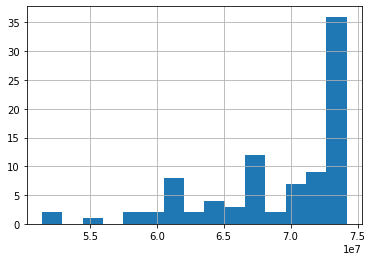

In [97]:
df_2.profit.hist(bins=15)

<AxesSubplot:>

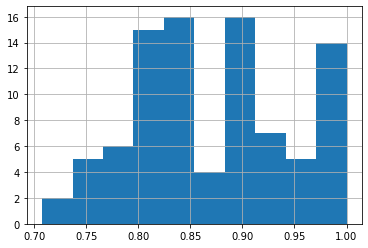

In [98]:
df_1.load_perc.hist()

In [102]:
df_2.query('profit<60000000')

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount,fuel_per_hour,consumed_fuel,fuel_price,spent_for_flight,profit,load_perc
98,136620,Anapa,Belgorod,59509500.0,79,0.816667,Sukhoi Superjet-100,97,1864,1522.266667,41.435,63075.0,59446425.0,0.814433
102,136642,Anapa,Belgorod,51507000.0,64,0.816667,Sukhoi Superjet-100,97,1864,1522.266667,41.435,63075.0,51443925.0,0.659794
144,136807,Anapa,Belgorod,51507000.0,68,0.833333,Sukhoi Superjet-100,97,1864,1553.333333,41.435,64362.0,51442638.0,0.701031
152,136844,Anapa,Belgorod,55784700.0,79,0.833333,Sukhoi Superjet-100,97,1864,1553.333333,41.435,64362.0,55720338.0,0.814433
164,136887,Anapa,Belgorod,57734400.0,78,0.816667,Sukhoi Superjet-100,97,1864,1522.266667,41.435,63075.0,57671325.0,0.804124
170,136922,Anapa,Belgorod,58956600.0,76,0.833333,Sukhoi Superjet-100,97,1864,1553.333333,41.435,64362.0,58892238.0,0.783505


In [103]:
df_2.query('load_perc<0.75')

,flight_id,departure,arrive,flight_revenue,passengers_amount,flight_time,model,seats_amount,fuel_per_hour,consumed_fuel,fuel_price,spent_for_flight,profit,load_perc
102,136642,Anapa,Belgorod,51507000.0,64,0.816667,Sukhoi Superjet-100,97,1864,1522.266667,41.435,63075.0,51443925.0,0.659794
144,136807,Anapa,Belgorod,51507000.0,68,0.833333,Sukhoi Superjet-100,97,1864,1553.333333,41.435,64362.0,51442638.0,0.701031


## Выводы

Таким образом, рейсы, от которых можно отказаться в зимний период, лучше выбрать по совпадению среди низкоприбыльных и малопосещяемых.